# Generate an Hologram in a Fits file 
====================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/CNRS
- date : June 02 2017



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
import numpy as np

In [3]:
from astropy.io import fits

In [4]:
from datetime import datetime, timedelta

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [6]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2017-06-02 12:36:24.844640
fits date format for the analysis :  2017-06-02T12:36:24


# Fits file

In [7]:
hologram_file='holo_020517.fits'

## Constants

In [8]:
nm_to_mm= 1e-6

In [9]:
mm_to_mum=1e3

In [10]:
cm_to_mm=10

In [11]:
cm_to_mum=cm_to_mm*mm_to_mum

In [12]:
cm_to_mum

10000.0

## Hologram parameters

In [13]:
dz=58 # mm  : distance between sources plane and hologram plane

In [14]:
dx=11.3 # mm   : off-optical axis shift of one source wrt another for R300 lines/mm

In [15]:
XMIN=-5.0 # mm  1cm x 1 cm
XMAX=5.0 # mm
YMIN=-5.0 # mm
YMAX=5.0 # mm

In [16]:
#NBPOINTS=25000  # array size
NBPOINTS=20000  # array size

## Units

- all in mm

In [17]:
lambda_0=640*nm_to_mm # nm to mm

## Définition de l'amplitude d'une source ponctuelle


- soit une source monochromatique de longueur d'onde $\lambda_0$, placée en $O(0,0,0)$, on considère l'amplitude en $M(x,y,z)$

$$
U(x,y,z) = \frac{\cos (\vec{k} \cdot \vec{OM} - \omega t)}{\| \vec{OM} \|}  = \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+z^2} -\omega t)}{\sqrt{x^2+y^2+z^2}}
$$

Par la suite, on se place à un instant fixé $t$. La dépendance temporelle peut être éliminée


In [18]:
def U_re(x,y,z):
    ampl = np.cos(2*np.pi*np.sqrt(x**2+y**2+z**2)/lambda_0)/np.sqrt(x**2+y**2+z**2)
    return ampl

In [19]:
def U_im(x,y,z):
    ampl = np.sin(2*np.pi*np.sqrt(x**2+y**2+z**2)/lambda_0)/np.sqrt(x**2+y**2+z**2)
    return ampl

## Amplitude au niveau de la source

In [20]:
FlagPlot=False

In [21]:
X=np.linspace(XMIN,XMAX,NBPOINTS)
Y=np.zeros(NBPOINTS)
Z=np.zeros(NBPOINTS)
theU_re=U_re(X,Y,Z)
theU_re=U_im(X,Y,Z)

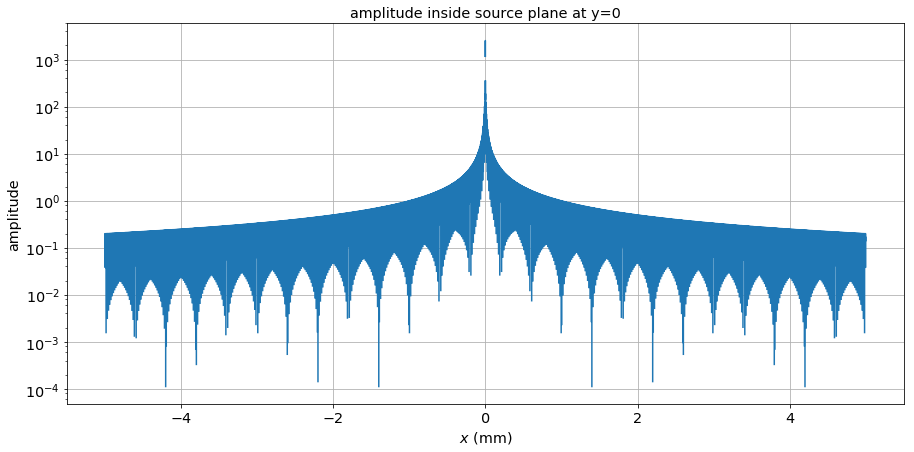

In [22]:
plt.semilogy(X,theU_re)
plt.grid(True)
title="amplitude inside source plane at y=0"
plt.title(title)
plt.xlabel('$x$ (mm)')
plt.ylabel('amplitude')

In [23]:
X=np.linspace(XMIN,XMAX,NBPOINTS)
Y=np.linspace(YMIN,YMAX,NBPOINTS)
Z=np.zeros(NBPOINTS)

In [24]:
xv, yv = np.meshgrid(X, Y)

In [25]:
if FlagPlot:
    U0_re=U_re(xv,yv,0)
    U0_im=U_im(xv,yv,0)
    
    plt.figure(figsize=(10,10))
    plt.imshow(U0_re,cmap='gray',extent=[X.min(),X.max(),Y.min(),Y.max()],aspect=1,norm=LogNorm(vmin=0.1, vmax=1000.))
    title="amplitude inside source plane"
    plt.title(title)
    plt.xlabel('$x$ (mm)')
    plt.ylabel('$y$ (mm)')
    plt.colorbar()

## Dans le plan de l'hologramme

### Source placée sur l'axe optique


On se place maintenant dans le plan de l'hologramme qui est à la distance z=-dz de la source $S1$ placée sur l'axe
optique $z$.
L'amplitude de $S1$ and le plan de l'hologramme est


$$
U_1(x,y)=U(x,y,-dz)= \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}
$$


In [26]:
U1_re=U_re(xv,yv,-dz)
U1_im=U_im(xv,yv,-dz)

In [27]:
if FlagPlot:
    plt.figure(figsize=(10,10))
    plt.imshow(U1_re,cmap='gray',extent=[X.min(),X.max(),Y.min(),Y.max()],aspect=1)
    title="amplitude inside hologram plane, On-axe source"
    plt.title(title)
    plt.xlabel('$x$ (mm)')
    plt.ylabel('$y$ (mm)')
    plt.colorbar()

### Source hors axe optique

On se place maintenant dans le plan de l'hologramme qui est à la distance z=-dz de la source $S2$ déplacée de $dy$ hors axe
optique.
L'amplitude de $S1$ and le plan de l'hologramme est


$$
U_2(x,y)=U(x,y+dy,-dz)= \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}}
$$




In [28]:
U2_re=U_re(xv-dx,yv,-dz)
U2_im=U_im(xv-dx,yv,-dz)

In [29]:
if FlagPlot:
    plt.figure(figsize=(10,10))
    plt.imshow(U2_re,cmap='gray',extent=[X.min(),X.max(),Y.min(),Y.max()],aspect=1)
    title="amplitude inside hologram plane, Off-axe source"
    plt.title(title)
    plt.xlabel('$x$ (mm)')
    plt.ylabel('$y$ (mm)')
    plt.colorbar()

## Somme des amplitudes


Les amplitudes des deux sources $S1$ et $S2$ interfèrent.
Dans le plan de l'hologramme, on obtient l'amplitude:
$$
U(x,y)=U_1(x,y)+U_2(x,y)= \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}+\frac{ \cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}}
$$

In [30]:
U3_re=U1_re+U2_re
U3_im=U1_im+U2_im

In [31]:
if FlagPlot:
    plt.figure(figsize=(10,10))
    plt.imshow(U3_re,cmap='gray',extent=[X.min(),X.max(),Y.min(),Y.max()],aspect=1)
    title="Amplitude sum inside hologram plane"
    plt.title(title)
    plt.xlabel('$x$ (mm)')
    plt.ylabel('$y$ (mm)')
    plt.colorbar()

## Intensité
Les amplitudes des deux sources $S1$ et $S2$ interfèrent.
Dans le plan de l'hologramme, on obtient l'intensité:
$$
I(x,y)= \left\| U_1(x,y)+U_2(x,y) \right\|^2= \left\| \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}+\frac{ \cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}} \right\|^2
$$


In [32]:
U4=U3_re**2+U3_im**2

In [33]:
if FlagPlot:
    plt.figure(figsize=(10,10))
    plt.imshow(U4,cmap='gray',extent=[X.min(),X.max(),Y.min(),Y.max()],aspect=1)
    title="Intensity (amplitude sum) inside hologram plane"
    plt.title(title)
    plt.xlabel('$x$ (mm)')
    plt.ylabel('$y$ (mm)')
    plt.colorbar()

In [34]:
U5=U4[NBPOINTS/2,:]

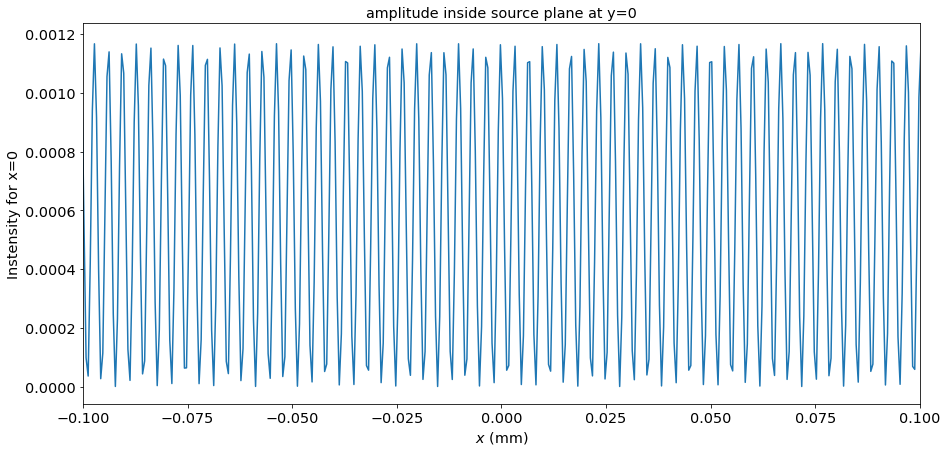

In [35]:
plt.plot(X,U5)
title="amplitude inside source plane at y=0"
plt.title(title)
plt.xlim(-0.1,0.1)
plt.xlabel('$x$ (mm)')
plt.ylabel('Instensity for x=0')

In [36]:
U4.shape

(20000, 20000)

In [37]:
if FlagPlot:
    plt.imshow(U4,cmap='gray',extent=[X.min(),X.max(),Y.min(),Y.max()],aspect=1)

# Save fits file

In [38]:
hdu = fits.PrimaryHDU(U4)

In [39]:
hdu.header["DATE"]= date_of_analysis

In [40]:
hdu.header["XMIN"]=XMIN
hdu.header["XMAX"]=XMAX
hdu.header["YMIN"]=YMIN
hdu.header["YMAX"]=YMAX

In [41]:
hdu.header["WL0"]=lambda_0
hdu.header["UNITS"]="mm"
hdu.header["AUTHOR"]="Sylvie Dagoret-Campagne"
hdu.header["AFFIL"]="LAL/IN2P3/CNRS"
hdu.header["COMMENT"]="Hologram 300 lines per mm"

In [42]:
hdulist = fits.HDUList([hdu])
hdulist.writeto(hologram_file,overwrite=True)